# Initial portfolio calculations:

A portfolio is a set of financial assets, such as actions or bonds, selected to achieve a specific financial objective: maximize performance, minimize risk or balance both.Wallet management implies strategic decisions on assets, diversification and periodic adjustments according to market conditions.

In this notebook, we will learn the basic notions to characterize a portfolio in terms of profitability and volatility from the assets that compose it.

## Portfolios of two assets

Defining an asset portfolio implies specifying the different financial or active instruments that compose it and the proportion in which it is invested in each.If we call:

* $ w_1 $ a proportion of investment in the asset $1$ $\Rightarrow w_2 = 1-w_1$.  It should be fulfilled that $w_1 + w_2 = 1.0$ as it represents 100% of the investment.

* $ \bar r_p $ a the average profitability or hope of the portfolio $ \rightarrow \boldsymbol {\bar {r} _p = w_1 \bar {r} _1 + w_2 \bar {r} _2} $.  It is a weighted sum of the profitability of each asset for the investment percentage $ w_i $ in each asset.


* Variance $ \boldsymbol {\sigma_ {p}^2 = w_1^2 \sigma_ {1}^2 + w_2^2 \sigma_ {2}^2 + 2 w_1 w_2 \sigma_ {12}} \quad being \quad \sigma_ {12} = \rho_ {12} \sigma_1 \sigma_2 $, where $ \rho_ {12} $ is the correlation coefficient between assets 1 and 2. The variance of the portfolio is affected by covariances ($\Sigma_{12} $) among the assets.

* Volatility $ \sigma_ {p} = \sqrt {\sigma_ {p}^2} $

**Note: The risk (volatility of a portfolio) does not depend only on the volatilities of the assets that compose it but also on how those assets are related to each other (covariances)**

We define two functions:

* **calc_ret_cartera** A function that, given a portfolio, returns the expected profitability

* **calc_std_cartera** A function that, given a wallet, returns us the variance of the portfolio

* An example portfolio with two assets: **portfolio**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf

<div Style = "background-color: #e0f7fa; padding: 10px;">

Please define two functions as follows:

- **calc_ret_cartera**: This function should take w1, w2, r1, and r2 as parameters and return the expected portfolio return.

- **calc_std_cartera**: This function should take w1, w2, std1, std2, and rho as parameters and return the portfolio's standard deviation using the formula that includes the correlation between the assets.

In [2]:
def calc_ret_cartera(w1, w2, r1, r2):
    return w1 * r1 + w2 * r2

In [3]:
def calc_std_cartera(w1, w2, std1, std2, rho):
    return np.sqrt(w1**2 * std1**2 + w2**2 * std2**2 + 2 * w1 * w2 * std1 * std2 * rho)

In [4]:
#definimos una cartera con dos activos
ret1 = 0.2 #retornos esperados del activo 1
ret2 = 0.1 #retornos esperados del activo 2

std1 = 0.4 #volatilidad del activo 1
std2 = 0.2 #volatilidad del activo 2

p1 = 0.4 #peso del activo 1
p2 = 0.6 #peso del activo 2

# definimos el coeficiente de correlación
coef_corr = 0.6

In [5]:
print(f'El retorno de la cartera es: {100*calc_ret_cartera(p1, p2, ret1, ret2):.2f} %')
print(f'La volatilidad de la cartera es: {100*calc_std_cartera(p1, p2, std1, std2, coef_corr):.2f} %')

El retorno de la cartera es: 14.00 %
La volatilidad de la cartera es: 25.11 %


<div Style = "background-color: #e0f7fa; padding: 10px;">

### Problem Statement

Calculate the portfolio profitability and volatility in two scenarios:

1. **Varying the correlation coefficient**: Keep the asset weights fixed, and change the correlation coefficient between the assets from -1 to 1. 

2. **Varying the weights**: Keep the correlation coefficient fixed, and change the weights of the assets from 0 to 1.

In both cases, create a plot that represents the portfolio's profitability (return) against its volatility.


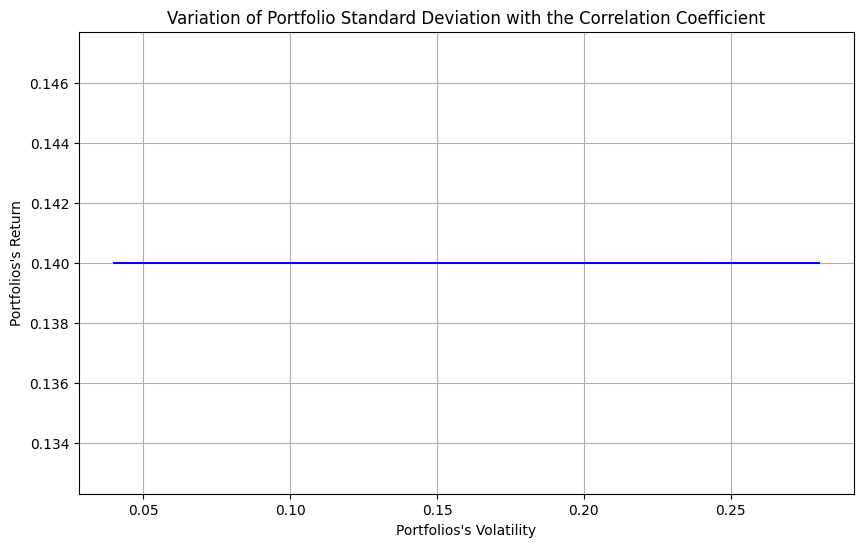

In [6]:
# Generamos valores de correlación entre -1 y 1
rho_values = np.linspace(-1, 1, 100)

# Calculamos la desviación estándar de la cartera para cada valor de correlación
std_cartera = [calc_std_cartera(p1, p2, std1, std2, rho) for rho in rho_values]
ret_cartera = [calc_ret_cartera(p1, p2, ret1, ret2) for rho in rho_values]

# Graficamos la desviación estándar de la cartera en función de la correlación
plt.figure(figsize=(10, 6))
plt.plot(std_cartera, ret_cartera, label='Desviación estándar de la cartera', color='blue')
plt.xlabel("Portfolios's Volatility")
plt.ylabel("Portfolios's Return")
plt.title("Variation of Portfolio Standard Deviation with the Correlation Coefficient")


# Configuramos leyenda y visualización
#plt.legend()
plt.grid(True)
plt.show()

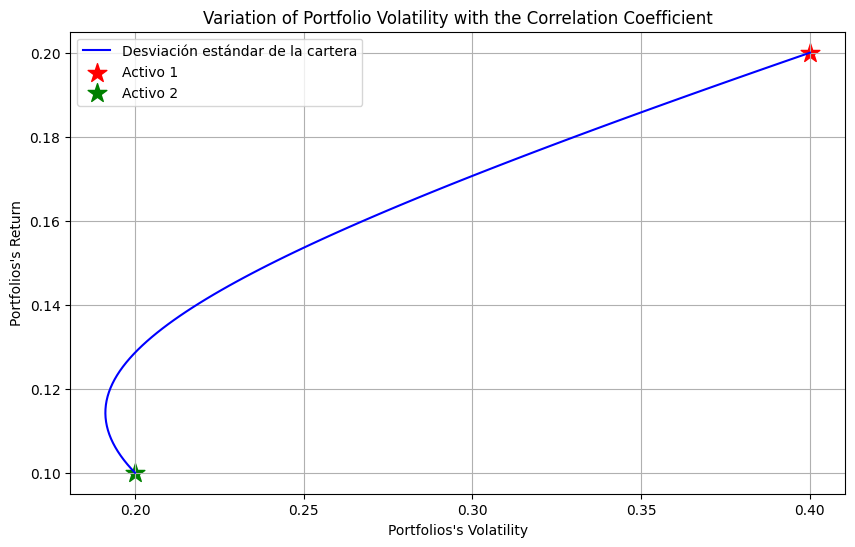

In [7]:
# Generar valores de correlación entre -1 y 1
p1_values = np.linspace(0, 1, 100)

rho = 0.2

# Calcular la desviación estándar de la cartera para cada valor de correlación
std_cartera = [calc_std_cartera(p1, 1-p1, std1, std2, rho) for p1 in p1_values]
ret_cartera = [calc_ret_cartera(p1, 1-p1, ret1, ret2) for p1 in p1_values]

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(std_cartera, ret_cartera, label='Desviación estándar de la cartera', color='blue')
plt.xlabel("Portfolios's Volatility")
plt.ylabel("Portfolios's Return")
plt.title("Variation of Portfolio Volatility with the Correlation Coefficient")


# Añadimos estrellas para marcar los puntos de los activos individuales
plt.scatter(std1, ret1, color="red", marker="*", s=200, label="Activo 1")
plt.scatter(std2, ret2, color="green", marker="*", s=200, label="Activo 2")
plt.legend()
plt.grid(True)
plt.show()

<div Style = "background-color: #e0f7fa; padding: 10px;">

### Problem Statement

**Minimizing Risk and Maximizing Return in a Two-Asset Portfolio**

You have a portfolio consisting of two assets, A and B, with the following characteristics:

- **Expected return of asset A**: 8%
- **Standard deviation of asset A (σ_A)**: 15%
- **Expected return of asset B**: 12%
- **Standard deviation of asset B (σ_B)**: 20%
- **Correlation coefficient (ρ) between assets A and B**: 0.3 

1. **Objective**:
   - Find the **portfolio allocation** that minimizes portfolio risk.
   - Find the **portfolio allocation** that maximizes portfolio return.



In [8]:
# Función para calcular la rentabilidad esperada de la cartera
def calc_rentabilidad_cartera(pesos, retornos):
    """
    Calcula la rentabilidad esperada de una cartera dada una lista de pesos y retornos.

    pesos: array-like, pesos de cada activo en la cartera.
    retornos: array-like, retornos esperados de cada activo.

    return: float, rentabilidad esperada de la cartera.
    """
    return np.dot(pesos, retornos)

# Función para calcular la volatilidad (desviación estándar) de la cartera
def calc_volatilidad_cartera(pesos, matriz_covarianzas):
    """
    Calcula la volatilidad de una cartera dada una lista de pesos y la matriz de covarianzas.

    pesos: array-like, pesos de cada activo en la cartera.
    matriz_covarianzas: 2D array, matriz de covarianzas de los activos.

    return: float, volatilidad de la cartera.
    """
    return np.sqrt(pesos @ matriz_covarianzas @ pesos.T)

In [9]:
# Parámetros de la cartera
retornos = np.array([0.08, 0.12])     # Rentabilidad esperada de los activos A y B
desviaciones = np.array([0.15, 0.20])       # Desviación estándar de los activos A y B
correlacion = 0.3                 # Correlación entre los activos A y B

# Matriz de covarianzas
matriz_covarianzas = np.array([[desviaciones[0]**2, correlacion * desviaciones[0] * desviaciones[1]],
                               [correlacion * desviaciones[0] * desviaciones[1], desviaciones[1]**2]])

# Generamos pesos para el activo A entre 0 y 1
pesos_A = np.linspace(0, 1, 500)
pesos_B = 1 - pesos_A

# Calculamos el rendimiento esperado y la desviación estándar de cada portafolio
rendimientos_portafolios = []
riesgos_portafolios = []

for w_A, w_B in zip(pesos_A, pesos_B):
    # Vector de pesos para los dos activos
    pesos = np.array([w_A, w_B])
    
    # Calcular rentabilidad y volatilidad usando las funciones
    rendimiento_portafolio = calc_rentabilidad_cartera(pesos, retornos)
    volatilidad_portafolio = calc_volatilidad_cartera(pesos, matriz_covarianzas)
    
    # Agregar los resultados a las listas
    rendimientos_portafolios.append(rendimiento_portafolio)
    riesgos_portafolios.append(volatilidad_portafolio)
    
indice_min_riesgo = np.argmin(riesgos_portafolios)
indice_max_return = np.argmax(rendimientos_portafolios)


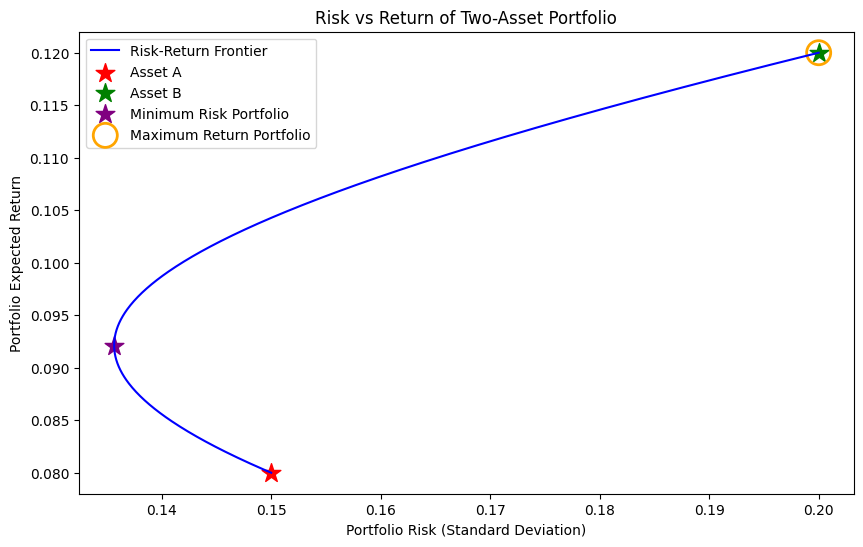

In [10]:

# Graficamos los portafolios
plt.figure(figsize=(10, 6))
plt.plot(riesgos_portafolios, rendimientos_portafolios, label="Risk-Return Frontier", color="blue")

# Añadimos estrellas para el activo A, activo B y la cartera de menor riesgo
plt.scatter(desviaciones[0], retornos[0], color="red", marker="*", s=200, label="Asset A")
plt.scatter(desviaciones[1], retornos[1], color="green", marker="*", s=200, label="Asset B")
plt.scatter(riesgos_portafolios[indice_min_riesgo], rendimientos_portafolios[indice_min_riesgo], 
            color="purple", marker="*", s=200, label="Minimum Risk Portfolio")

# Añadimos un círculo sin relleno para la cartera de máxima rentabilidad
plt.scatter(riesgos_portafolios[indice_max_return], rendimientos_portafolios[indice_max_return], 
            edgecolor="orange", facecolor="none", marker="o", s=300, linewidth=2, label="Maximum Return Portfolio")

# Configuramos etiquetas y leyenda
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Expected Return')
plt.title('Risk vs Return of Two-Asset Portfolio')
plt.legend()
plt.show()




#### Now we are going to do it with real assets. Download the data

<div Style = "background-color: #e0f7fa; padding: 10px;">

### Problem Statement

Download historical adjusted close price data for the assets **AAPL**, **GLD**, **MSFT**, and **SPY** from Yahoo Finance. The date range should be from **2018-12-31** to **2023-12-31**. Then, calculate the annualized mean returns and annualized volatility for each asset using the daily logarithmic returns. Create a bar chart for the annualized mean returns and another for the annualized volatilities.



In [11]:
data = yf.download(["AAPL", "GLD", "MSFT", "SPY"], start="2018-12-31", end="2023-12-31")
data = data.loc[:, "Adj Close"]

[*********************100%***********************]  4 of 4 completed


In [12]:
# rentabilidad = np.log(data).diff(axis=0).dropna(axis=0, how="any")
rentabilidad = np.log(data).diff().dropna()

rentabilidad.head(5)

Ticker,AAPL,GLD,MSFT,SPY
Date,,,,
2019-01-02 00:00:00+00:00,0.001141,0.000660,-0.004440,0.001040
2019-01-03 00:00:00+00:00,-0.104925,0.009025,-0.037482,-0.024152
2019-01-04 00:00:00+00:00,0.041804,-0.008119,0.045460,0.032947
2019-01-07 00:00:00+00:00,-0.002228,0.003453,0.001275,0.007854
2019-01-08 00:00:00+00:00,0.018884,-0.002712,0.007224,0.009351


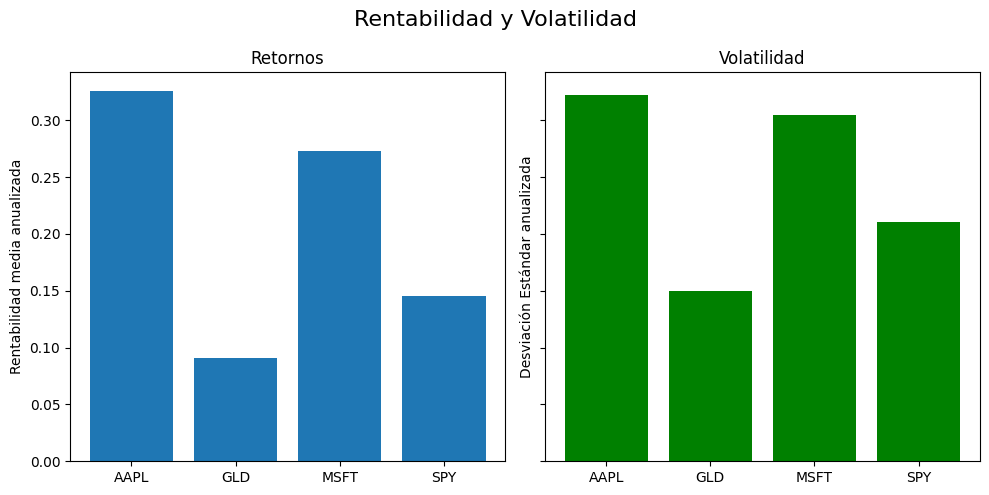

In [13]:
import matplotlib.pyplot as plt

# Puedes calcular los valores medios y la desviación estándar de cada columna así:
means = rentabilidad.mean() * 252
stds = rentabilidad.std() * np.sqrt(252)

# Crear una figura con dos subplots, uno encima del otro
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey="row")

# Crear el gráfico de barras de los valores medios en la parte superior
axes[0].bar(means.index, means.values)
axes[0].set_ylabel("Rentabilidad media anualizada")
axes[0].set_title("Retornos")

# Crear el gráfico de barras de los valores de desviación estándar en la parte inferior
axes[1].bar(stds.index, stds.values, color="green")
axes[1].set_ylabel("Desviación Estándar anualizada")
axes[1].set_title("Volatilidad")

# Añadir un título general a la figura
plt.suptitle("Rentabilidad y Volatilidad", fontsize=16)  # Título general

# Ajustar el espaciado entre los subplots para que no se superpongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<div Style = "background-color: #e0f7fa; padding: 10px;">

### Problem Statement

Calculate the annual profitability and volatility of a portfolio formed by 60% app and 40% GLD

In [14]:
#definimos una cartera con dos activos
ret_aapl = rentabilidad['AAPL'].mean() * 252 #retornos esperados del activo 1
ret_gld = rentabilidad['GLD'].mean() * 252 #retornos esperados del activo 2    

std_aapl = rentabilidad['AAPL'].std() * np.sqrt(252) #volatilidad del activo 1
std_gld = rentabilidad['GLD'].std() * np.sqrt(252) #volatilidad del activo 2

p_aapl = 0.6 #peso del AAPL
p_gld = 0.4 #peso de GLD

# definimos el coeficiente de correlación
coef_corr = np.corrcoef(rentabilidad['AAPL'], rentabilidad['GLD'])[0, 1]

In [15]:
rent_cartera = calc_ret_cartera(p_aapl, p_gld, ret_aapl, ret_gld)
std_cartera = calc_std_cartera(p_aapl, p_gld, std_aapl, std_gld, coef_corr)

print(f'Portfolio return is: {100*rent_cartera:.2f} %')
print(f"Portfolio's volatility is: {100*std_cartera:.2f} %")


Portfolio return is: 23.20 %
Portfolio's volatility is: 20.73 %


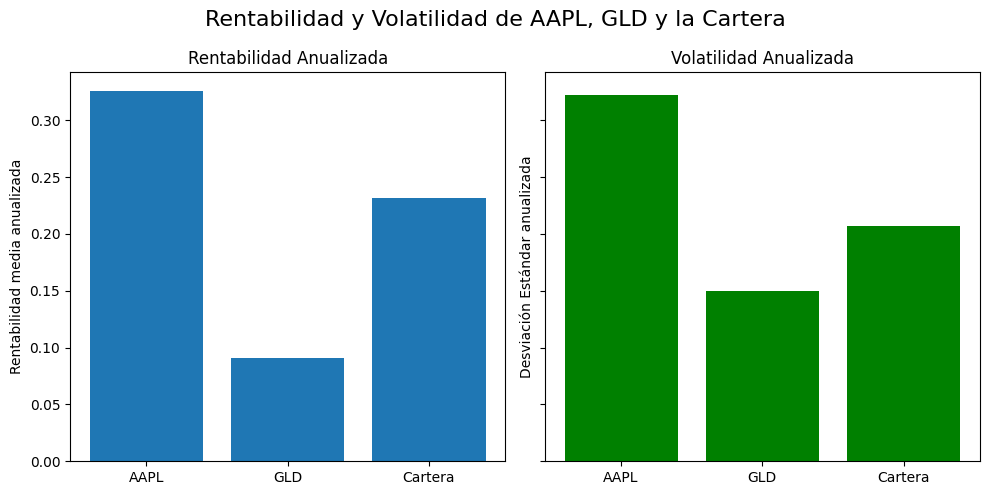

In [16]:
# Filtramos solo los activos que queremos mostrar, AAPL y GLD
means_filtered = means.loc[['AAPL', 'GLD']]
stds_filtered = stds.loc[['AAPL', 'GLD']]

# Añadimos los datos de la cartera
means_filtered['Cartera'] = rent_cartera
stds_filtered['Cartera'] = std_cartera

# Crear una figura con dos subplots, uno al lado del otro
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey="row")

# Crear el gráfico de barras de los valores medios (Rentabilidad) en el subplot de la izquierda
axes[0].bar(means_filtered.index, means_filtered.values)
axes[0].set_ylabel("Rentabilidad media anualizada")
axes[0].set_title("Rentabilidad Anualizada")

# Crear el gráfico de barras de los valores de desviación estándar en el subplot de la derecha
axes[1].bar(stds_filtered.index, stds_filtered.values, color="green")
axes[1].set_ylabel("Desviación Estándar anualizada")
axes[1].set_title("Volatilidad Anualizada")

# Añadir un título general a la figura
plt.suptitle("Rentabilidad y Volatilidad de AAPL, GLD y la Cartera", fontsize=16)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<div Style = "background-color: #e0f7fa; padding: 10px;">

### Problem Statement

It now calculates the profitability and volatility of a portfolio composed of four assets with the following data:

$ \text {weights} (\mathbf {w}) = \begin {bmatrix} 0.2 \\ 0.3 \\ 0.4 \\ 0.1 \end {bmatrix} $

$ \text {average return} (\mu) = \begin {bmatrix} 0.06 \\ 0.08 \\ 0.10 \\ 0.15 \end {bmatrix} $

$ \text {covariance matrix} (\sigma) = \begin {bmatrix}
0.10 & 0.01 & 0.03 & 0.05 \\
0.01 & 0.30 & 0.06 & -0.04 \\
0.03 & 0.06 & 0.40 & 0.02 \\
0.05 & -0.04 & 0.02 & 0.50 \\
\end {bmatrix} $

In [17]:
#DAtos del problema


# Generamos un vector a partir de una lista
pesos_w = np.array([0.2, 0.3, 0.4, 0.1])

rentabilidad_medias = np.array([0.06, 0.08, 0.1, 0.15])


# Generamos una matriz a partir de una lista de listas
matriz_covarianzas = np.array([[0.10, 0.01, 0.03, 0.05],
                               [0.01, 0.30, 0.06, -0.04],
                               [0.03, 0.06, 0.40, 0.02],
                               [0.05,-0.04, 0.02, 0.50]])


In [18]:
#INSERTAR TU CÓDIGO AQUÍ

# Calcula la rentabilidad media de la cartera mediante la multiplicación de los pesos de la cartera (pesos_w)
# por el vector de rentabilidades medias de los activos (rentabilidad_medias).
# La operación @ realiza el producto matricial entre el vector de pesos y el vector de rentabilidades.
rentabilidad_cartera = pesos_w.T @ rentabilidad_medias

# Imprime la rentabilidad media de la cartera con 4 decimales.
print(f"Rentabilidad media de cartera X: {rentabilidad_cartera:.4f}")

# Calcula la varianza de la cartera utilizando los pesos de los activos y la matriz de covarianzas.
# La operación matricial es pesos_w.T @ matriz_covarianzas @ pesos_w, que es una forma estándar de calcular 
# la varianza total de la cartera.
sigma2_cartera = pesos_w.T @ matriz_covarianzas @ pesos_w

# La volatilidad de la cartera es la raíz cuadrada de la varianza (desviación estándar).
volatilidad_cartera = np.sqrt(sigma2_cartera)

# Imprime la varianza (desviación típica al cuadrado) de la cartera con 4 decimales.
print(f"Desviación típica de cartera X: {sigma2_cartera:.4f}")

# Imprime la volatilidad de la cartera con 4 decimales.
print(f"Volatilidad de cartera X: {volatilidad_cartera:.4f}")


Rentabilidad media de cartera X: 0.0910
Desviación típica de cartera X: 0.1216
Volatilidad de cartera X: 0.3487


To calculate the returns and volatilities of several assets we need to multiply matrices:

**Profitability** of the portfolio $e (\tilde r_p) = \sum_ {i = 1}^{n} w_i e (\tilde r_i) $

$ E (\tilde r_p) = \begin {pmatrix} w_1 & w_2 & ... & w_n \end {pmatrix} \begin {pmatrix} \mu_1 \\\mu_2 \\ ... \\ \ \mu_n \end {pmatrix} = \mathbf {w}^t \mathbf {\mu} \qquad being \;\mu_i \;the \;profitability \;\;of \;the \;asset_i $

$\sigma²(\tilde R_p)=\begin{pmatrix}w_1 & w_2 & ... & w_N\end{pmatrix} \begin{pmatrix}\sigma_1^2 & \sigma_{12} & ... & \sigma_{1N}\\ 
 \sigma_{21}& \sigma_2^2 &...  & \sigma_{2N}\\ ... & ... & ... & ...\\  \sigma_{N1}& \sigma_{N2} & ... & \sigma_N^2\end{pmatrix} \begin{pmatrix}w_1 \\w_2  \\...  \\ w_N\end{pmatrix} = \mathbf{w}^T\mathbf{\Sigma}\mathbf{w}$

### To operate with matrices we use **arrays** of the library **numpy**

<center>
          <img src="../imgs/dataframe_vs_array.PNG" alt="Por qué curso" width="600"/>
</center>

**Arrays creation**

We can **create arrays** in multiple ways:

* From a list or list of lists

* Arrays of zeros or ones

* Between two values ​​and evenly distributed

* From a dataframe

In [19]:
lista_1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
array_1 = np.array(lista_1)
array_1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [20]:
lista_2 = [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]
array_2 = np.array(lista_2)
array_2

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [21]:
lista_3 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
array_3 = np.array(lista_3).reshape(2, 5)
array_3

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [22]:
# Generamos un vector de ceros de tamaño 10
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
# Generamos una matriz de ceros de tamaño 3x6
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [24]:
# Generamos un vector de unos de tamaño 2x3
array_unos = np.ones((2, 3))
array_unos

array([[1., 1., 1.],
       [1., 1., 1.]])

In [25]:
# Para ver dimensiones de un array
array_unos.shape

(2, 3)

In [26]:
# Generamos un vestor con valores equiespaciados

np.linspace(0, 1, 11) # (inicio, fin, número de puntos)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [27]:
data.head(2)

Ticker,AAPL,GLD,MSFT,SPY
Date,,,,
2018-12-31 00:00:00+00:00,37.707062,121.250000,95.926315,228.16626
2019-01-02 00:00:00+00:00,37.750095,121.330002,95.501328,228.40358


In [28]:
# Generamos un array a partir de un DataFrame
data.values

array([[ 37.70706177, 121.25      ,  95.92631531, 228.16625977],
       [ 37.75009537, 121.33000183,  95.50132751, 228.40357971],
       [ 33.98989105, 122.43000031,  91.98802185, 222.95326233],
       ...,
       [192.41983032, 192.58999634, 372.03671265, 472.05853271],
       [192.84820557, 191.47000122, 373.2401123 , 472.23684692],
       [191.8021698 , 191.16999817, 373.99597168, 470.86972046]])

<div Style = "background-color: #e0f7fa; padding: 10px;">

### Problem Statement

Calculate an array of weights of an equal-weighted portfolio of 20 assets and check that the sum of weights is worth 1

In [29]:
pesos = np.ones(20)/20
pesos

array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])

In [30]:
pesos.sum()

np.float64(1.0000000000000002)

In [31]:
# Ver dimensiones de un array

print(pesos.ndim)
print(pesos.shape)
print(pesos.size)

1
(20,)
20


<div Style = "background-color: #e0f7fa; padding: 10px;">

### Problem Statement

Calculate 100 different portfolios composed of AAPL and GLD, adjusting the weights evenly between both assets. The asset data is as follows:

Average returns: ret_aapl, ret_gld  

Volatilities: std_aapl, std_gld 

Correlation coefficient: coef_corr

In [32]:
pesos_aapl = np.linspace(0, 1, 100)
pesos_gld = 1 - pesos_aapl

# Inicializar listas para almacenar rentabilidades y volatilidades de las carteras
rentabilidades_carteras = []
volatilidades_carteras = []

# Calcular las rentabilidades y volatilidades para cada combinación de pesos
for w_aapl, w_gld in zip(pesos_aapl, pesos_gld):
    rentabilidad_cartera = calc_ret_cartera(w_aapl, w_gld, ret_aapl, ret_gld)
    volatilidad_cartera = calc_std_cartera(w_aapl, w_gld, std_aapl, std_gld, coef_corr)
    
    rentabilidades_carteras.append(rentabilidad_cartera)
    volatilidades_carteras.append(volatilidad_cartera)

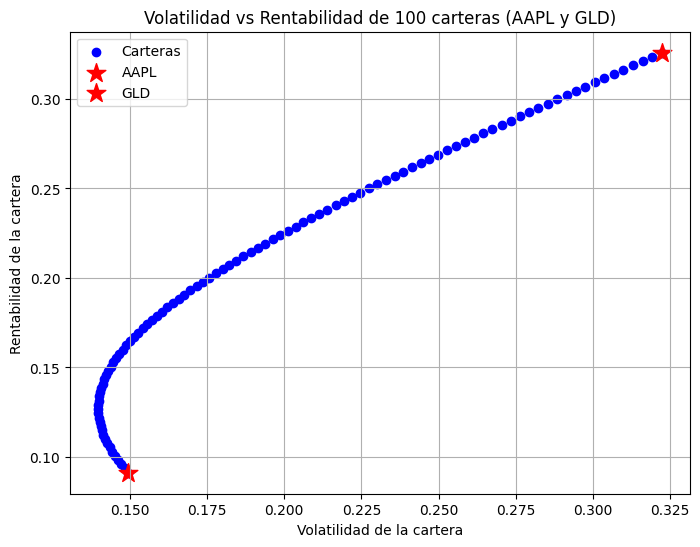

In [33]:

# Dibujar el scatter plot de volatilidades (en el eje X) y rentabilidades (en el eje Y)
plt.figure(figsize=(8, 6))
plt.scatter(volatilidades_carteras, rentabilidades_carteras, c='blue', marker='o', label="Carteras")

# Añadir estrellas rojas para los puntos de AAPL y GLD
plt.scatter(std_aapl, ret_aapl, c='red', marker='*', s=200, label="AAPL")  # AAPL con estrella roja
plt.scatter(std_gld, ret_gld, c='red', marker='*', s=200, label="GLD")    # GLD con estrella roja

# Etiquetas y título
plt.xlabel("Volatilidad de la cartera")
plt.ylabel("Rentabilidad de la cartera")
plt.title("Volatilidad vs Rentabilidad de 100 carteras (AAPL y GLD)")

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()


**Indexing and Slicing**

<div style="display: flex; align-items: center; justify-content: center;">
  
  <!-- Primera imagen con su título -->
  <figure style="margin-right: 20px; text-align: center;">
    <img src="../imgs/np_2.png" alt="drawing" width="90%"/>
    <figcaption>Figura 1: INDEXACIÓN</figcaption>
  </figure>
  
  <!-- Segunda imagen con su título -->
  <figure style="text-align: center;">
    <img src="../imgs/np_3.png" alt="drawing" width="50%"/>
    <figcaption>Figura 2: SLICING</figcaption>
  </figure>

</div>

In [34]:
array_2d = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])

In [35]:
print(array_2d.ndim)
print(array_2d.shape)
print(array_2d.size)

2
(2, 5)
10


<div Style = "background-color: #e0f7fa; padding: 10px;">

### Problem Statement

What will be the output of each of the following Python commands, assuming `array_2d` is a 2-dimensional NumPy array?

1. `print(array_2d)`
2. `print(array_2d[0, 0])`
3. `print(array_2d[0, 4])`
4. `print(array_2d[1, 0])`
5. `print(array_2d[1, 4])`
6. `print(array_2d[0, 1:4])`
7. `print(array_2d[1, 1:4])`
8. `print(array_2d[0:2, 0])`
9. `print(array_2d[0:2, 1])`
10. `print(array_2d[0:2, 2])`
11. `print(array_2d[0:2, 3])`
12. `print(array_2d[0:2, 1:3])`

For each command, describe the output and specify if it extracts a single element, a slice, or a subarray.

In [36]:
# print(array_2d)
# print(array_2d[0, 0])
# print(array_2d[0, 4])
# print(array_2d[1, 0])
# print(array_2d[1, 4])
# print(array_2d[0, 1:4])
# print(array_2d[1, 1:4])
# print(array_2d[0:2, 0])
# print(array_2d[0:2, 1])
# print(array_2d[0:2, 2])
# print(array_2d[0:2, 3])
# print(array_2d[0:2, 1:3])

<div Style = "background-color: #e0f7fa; padding: 10px;">

### Problem Statement

Given the previous covariance matrix (matrix_covariances), tell me:

* $\sigma_{1,2}$
* $\sigma_{2,3}$
* $\sigma^2_{4}$
* Shows covariances less than 0.02

In [37]:
matriz_covarianzas

array([[ 0.1 ,  0.01,  0.03,  0.05],
       [ 0.01,  0.3 ,  0.06, -0.04],
       [ 0.03,  0.06,  0.4 ,  0.02],
       [ 0.05, -0.04,  0.02,  0.5 ]])

In [38]:
print(f'Covarianza activo 1 con activo 2: {matriz_covarianzas[0, 1]:.2f}')
print(f'Covarianza activo 2 con activo 3: {matriz_covarianzas[1, 2]:.2f}')
print(f'Varianza activo 4: {matriz_covarianzas[3, 3]:.2f}')

Covarianza activo 1 con activo 2: 0.01
Covarianza activo 2 con activo 3: 0.06
Varianza activo 4: 0.50


In [39]:
mask = matriz_covarianzas < 0.02

matriz_covarianzas[mask]

array([ 0.01,  0.01, -0.04, -0.04])

**Matrix multiplications**

To calculate the profitability and volatilities of portfolios with several assets, it is necessary to multiply matrices.This is achieved efficiently using arrays from the Numpy Library in Python.

$\begin{bmatrix}
1 &2 \\ 
 3& 4
\end{bmatrix}\times
\begin{bmatrix}
5 &6 \\ 
 7& 8
\end{bmatrix} = 
\begin{bmatrix}
(1\cdot 5+2\cdot 7)&(1\cdot 6+2\cdot 8) \\ 
(3\cdot 5+4\cdot 7)&(3\cdot 6+4\cdot 8)
\end{bmatrix} = 
\begin{bmatrix}
19 &22 \\ 
 43& 50
\end{bmatrix}$

In [40]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

In [41]:
A @ B

array([[19, 22],
       [43, 50]])

In [42]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

- We can also use it to multiply a vector by a matrix

In [43]:
A = np.array([[1, 2], [3, 4]])
b = np.array([5, 6])

The operation would be the following
$\begin{bmatrix}
1 &2 \\ 
 3&4 
\end{bmatrix}\times \begin{bmatrix}
5 \\6 
\end{bmatrix}= \begin{bmatrix}
1\cdot 5 + 2 \cdot 6\\ 
3\cdot 5 + 4 \cdot 6
\end{bmatrix}= \begin{bmatrix}
17\\ 
39
\end{bmatrix}$

In [44]:
A @ b

array([17, 39])

In [45]:
# OJO QUE NO ES LO MISMO QUE b@A

b@A

array([23, 34])

In this case, the operation would be the following
$\begin{bmatrix}
5 &6 
\end{bmatrix}\times \begin{bmatrix}
1 &2 \\ 
 3&4 
\end{bmatrix}= \begin{bmatrix}
(5\cdot 1 + 6 \cdot 3)& 
(5\cdot 2 + 6 \cdot 4)
\end{bmatrix}= \begin{bmatrix}
23& 
34
\end{bmatrix}$

<div Style = "background-color: #e0f7fa; padding: 10px;">

### Problem Statement

Calculate the profitability and volatility of a team portfolio formed by the four AAPL, GLD, MSFT and SPY assets.

1- Download and clean the data from 2010 to the present from Yahoo finance.

2- Calculates average returns, volatilities and covariances

3- Generates weights and calculates portfolio returns and volatility

4- Displays the results

1- Download and clean the data from 2010 to the present from Yahoo finance.

2- Calculate average profitability, volatilities and covariances

3- generates the weights and calculates profitability and volatility of the portfolio

4- shows the results

___________________

### Another way to address portfolio analysis

But we can also calculate the daily returns of the portfolio and then calculate the average profitability and volatility

$ R_ {portfolio, t} = w_1 * r_ {1, t} + w_2 * r_ {2, t} $

In [46]:
rentabilidad_cartera = p_aapl * rentabilidad['AAPL'] + p_gld * rentabilidad['GLD']

rent_cartera_media = rentabilidad_cartera.mean() * 252
std_cartera = rentabilidad_cartera.std() * np.sqrt(252)

print(f'El retorno de la cartera es: {100*rent_cartera_media:.2f} %')
print(f'La volatilidad de la cartera es: {100*std_cartera:.2f} %')

El retorno de la cartera es: 23.20 %
La volatilidad de la cartera es: 20.73 %


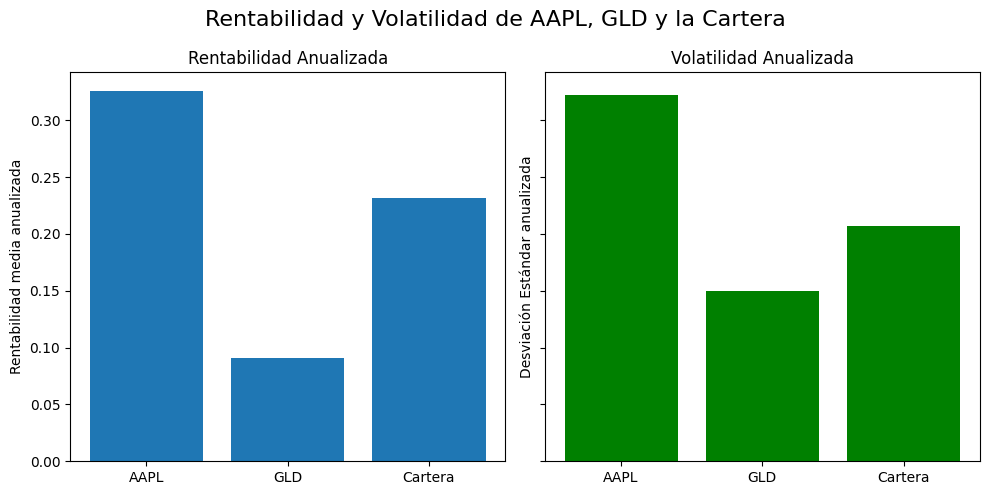

In [47]:
# Filtramos solo los activos que queremos mostrar, AAPL y GLD
means_filtered = means.loc[['AAPL', 'GLD']]
stds_filtered = stds.loc[['AAPL', 'GLD']]

# Añadimos los datos de la cartera
means_filtered['Cartera'] = rent_cartera_media
stds_filtered['Cartera'] = std_cartera

# Crear una figura con dos subplots, uno al lado del otro
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey="row")

# Crear el gráfico de barras de los valores medios (Rentabilidad) en el subplot de la izquierda
axes[0].bar(means_filtered.index, means_filtered.values)
axes[0].set_ylabel("Rentabilidad media anualizada")
axes[0].set_title("Rentabilidad Anualizada")

# Crear el gráfico de barras de los valores de desviación estándar en el subplot de la derecha
axes[1].bar(stds_filtered.index, stds_filtered.values, color="green")
axes[1].set_ylabel("Desviación Estándar anualizada")
axes[1].set_title("Volatilidad Anualizada")

# Añadir un título general a la figura
plt.suptitle("Rentabilidad y Volatilidad de AAPL, GLD y la Cartera", fontsize=16)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

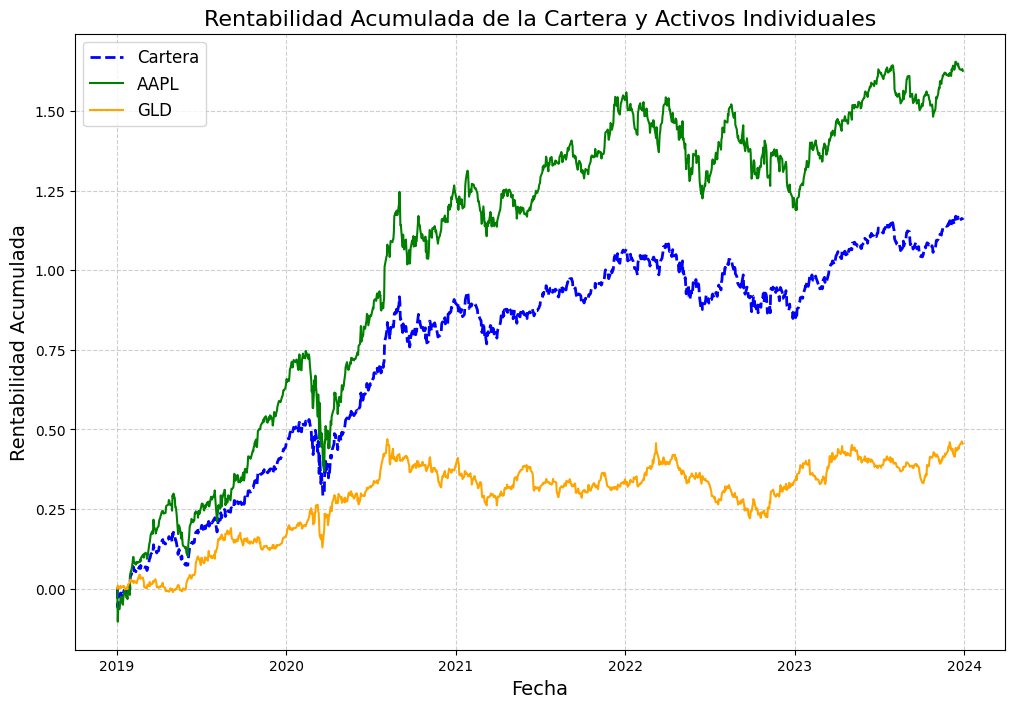

In [48]:
# Cálculo de la rentabilidad acumulada
rentabilidad_cartera_acum = rentabilidad_cartera.cumsum()

# Crear la figura y el tamaño
plt.figure(figsize=(12, 8))

# Trazar la rentabilidad acumulada de la cartera y los activos individuales
plt.plot(rentabilidad['AAPL'].index, rentabilidad_cartera_acum, label='Cartera', linewidth=2, color='blue', linestyle='--')
plt.plot(rentabilidad['AAPL'].cumsum().index, rentabilidad['AAPL'].cumsum(), label='AAPL', linewidth=1.5, color='green')
plt.plot(rentabilidad['GLD'].cumsum().index, rentabilidad['GLD'].cumsum(), label='GLD', linewidth=1.5, color='orange')

# Añadir título y etiquetas a los ejes
plt.title('Rentabilidad Acumulada de la Cartera y Activos Individuales', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Rentabilidad Acumulada', fontsize=14)

# Añadir leyenda
plt.legend(fontsize=12)

# Añadir cuadrícula para mejor visualización
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar la gráfica
plt.show()


### Correlation between assets

If you remember, the volatility of the portfolio depends on the volatility of assets and relationships (covariances) between them. How could we visualize if the assets are correlated?

A `scatter_matrix`nos presents a combination of` `histogram`` in the main diagonal and a Scatter Plot with the` `covariance`` in the rest of the matrix positions.

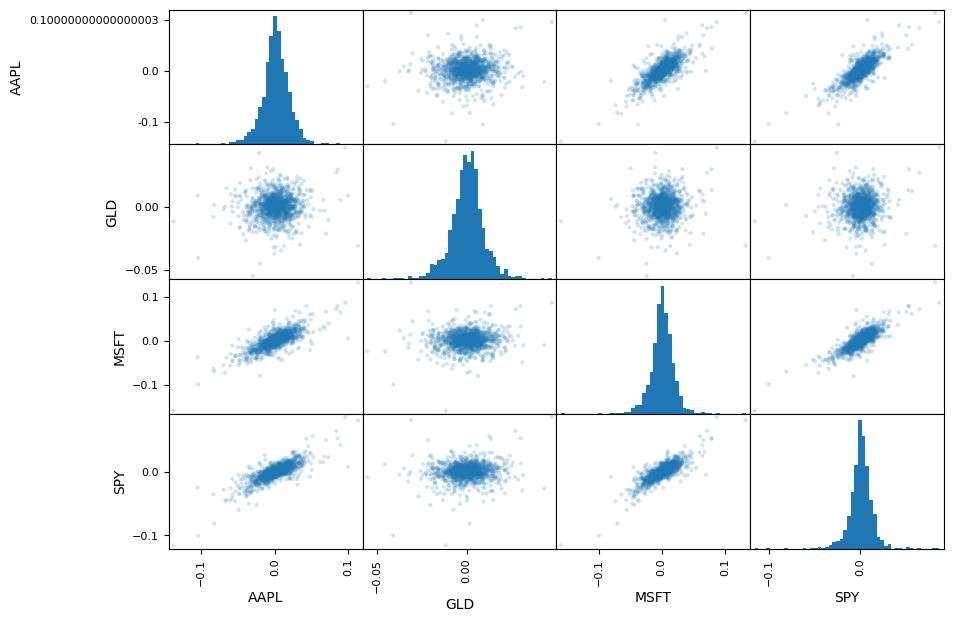

In [49]:
import pandas as pd

pd.plotting.scatter_matrix(rentabilidad, figsize=(10, 7), alpha=0.2, hist_kwds={"bins":50});

Visualizing the covariance we can see if two assets are correlated, but we cannot see the strength of the correlation.For this we have to use the correlation and not the covariance.

$$Var(x)=\frac{1}{n}\sum_{i=1}^{n}{(x-\bar{x})^2}$$

$$Std(x)=\sqrt{Var(x)}$$

$$Cov(x,y)=\frac{1}{n}\sum_{i=1}^{n}{(x-\bar{x})(y-\bar{y})} $$

$$Corr(x,y)=\frac{Cov(x,y)}{Std(x)Std(y)}$$

In [50]:
corr = rentabilidad.corr()
corr

Ticker,AAPL,GLD,MSFT,SPY
Ticker,,,,
AAPL,1.000000,0.085376,0.760846,0.805812
GLD,0.085376,1.000000,0.091758,0.107629
MSFT,0.760846,0.091758,1.000000,0.825804
SPY,0.805812,0.107629,0.825804,1.000000


Heatmap

Ref.: Https://seaborn.pydata.org/generated/seaborn.heatmap.html

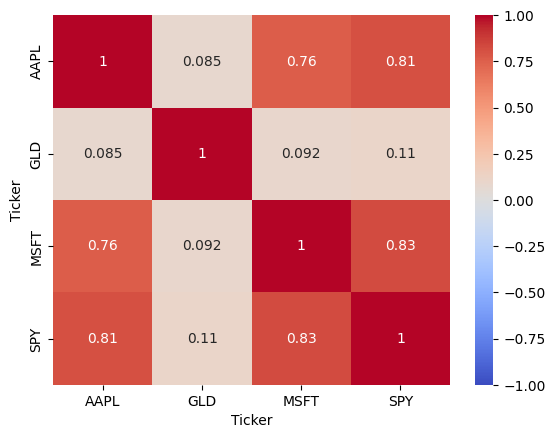

In [51]:
import seaborn as sns

sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

<div Style = "background-color: #e0f7fa; padding: 10px;">

### Problem Statement

Exercise: Comparation of portfolios and profitability and risk analysis

Exercise description: It is requested to compare two portfolios with different compositions to analyze their profitability and volatilities.The first portfolio is formed by 60% AAPL and 40% GLD, while the second portfolio is composed of 60% AAPL and 40% MSFT.

Instructions:

a) Calculate the daily profitability of both wallets using historical data from previous exercises for AAPL, GLD, and MSFT.

b) Graph the daily accumulated profitability of each of the portfolios in the same graph.

c) Calculate the average profitability and volatility of each of the portfolios.

d) Compare the results of the two portfolios and explain the differences observed both in the graphs and in the profitability and volatility measures.

a) Calculate the daily profitability of both portfolios:

In [52]:
rentabilidad.index = pd.to_datetime(rentabilidad.index.date)

In [53]:
# Define the weights for each portfolio
weights_portfolio_1 = {'AAPL': 0.6, 'GLD': 0.4}
weights_portfolio_2 = {'AAPL': 0.6, 'MSFT': 0.4}

# Calculate the daily returns for each portfolio
rentabilidad['Portfolio_1'] = (
    weights_portfolio_1['AAPL'] * rentabilidad['AAPL'] +
    weights_portfolio_1['GLD'] * rentabilidad['GLD']
)

rentabilidad['Portfolio_2'] = (
    weights_portfolio_2['AAPL'] * rentabilidad['AAPL'] +
    weights_portfolio_2['MSFT'] * rentabilidad['MSFT']
)


b) Graph the daily accumulated profitability of each of the portfolios:

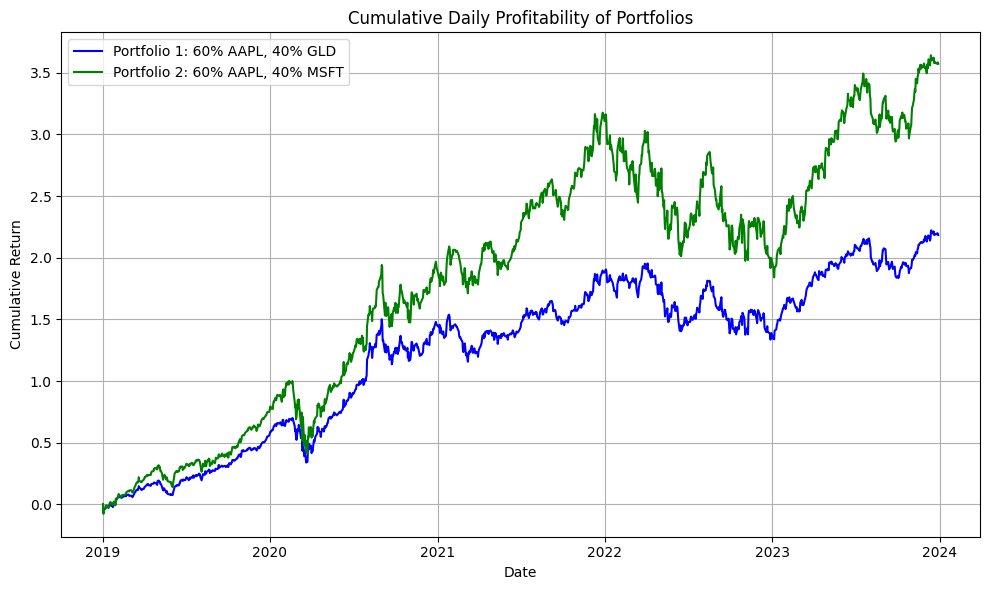

In [54]:
# Calculate cumulative returns for log returns
rentabilidad['Cumulative_Portfolio_1'] = np.exp(rentabilidad['Portfolio_1'].cumsum()) - 1
rentabilidad['Cumulative_Portfolio_2'] = np.exp(rentabilidad['Portfolio_2'].cumsum()) - 1


# Plot the cumulative returns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(rentabilidad['Cumulative_Portfolio_1'], label='Portfolio 1: 60% AAPL, 40% GLD', color='blue')
plt.plot(rentabilidad['Cumulative_Portfolio_2'], label='Portfolio 2: 60% AAPL, 40% MSFT', color='green')
plt.title('Cumulative Daily Profitability of Portfolios')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


c) Calculate the average profitability and volatility of each of the portfolios:

In [55]:
# Define the number of trading days in a year
trading_days = 252

# Calculate the average annual return and annual volatility for each portfolio
mean_portfolio_1_annual = rentabilidad['Portfolio_1'].mean() * trading_days * 100
volatility_portfolio_1_annual = rentabilidad['Portfolio_1'].std() * np.sqrt(trading_days) * 100

mean_portfolio_2_annual = rentabilidad['Portfolio_2'].mean() * trading_days * 100
volatility_portfolio_2_annual = rentabilidad['Portfolio_2'].std() * np.sqrt(trading_days) * 100

# Print the results
print(f"Portfolio 1: 60% AAPL, 40% GLD")
print(f"Average Annual Return: {mean_portfolio_1_annual:.2f}%")
print(f"Annual Volatility (Annualized Std Dev): {volatility_portfolio_1_annual:.2f}%")

print("\nPortfolio 2: 60% AAPL, 40% MSFT")
print(f"Average Annual Return: {mean_portfolio_2_annual:.2f}%")
print(f"Annual Volatility (Annualized Std Dev): {volatility_portfolio_2_annual:.2f}%")





Portfolio 1: 60% AAPL, 40% GLD
Average Annual Return: 23.20%
Annual Volatility (Annualized Std Dev): 20.73%

Portfolio 2: 60% AAPL, 40% MSFT
Average Annual Return: 30.45%
Annual Volatility (Annualized Std Dev): 29.70%


d) Compare the results of the two portfolios:

### Analysis of Portfolio Performance:
- **Profitability Comparison**: 
    - Portfolio 1 (60% AAPL, 40% GLD) and Portfolio 2 (60% AAPL, 40% MSFT) have different performance trends. 
    - Portfolio 2, being composed of two tech stocks (AAPL and MSFT), may show higher returns during tech market rallies but also higher risk due to the concentration in a single sector.
    - Portfolio 1, including GLD (a gold ETF), may provide more stability during periods of market downturns as gold is often considered a safe-haven asset.

- **Volatility Analysis**:
    - Portfolio 2 is likely to have a higher volatility compared to Portfolio 1 due to the correlation between AAPL and MSFT, leading to larger swings in performance.
    - Portfolio 1 might exhibit lower volatility, as the inclusion of GLD can help offset fluctuations in AAPL due to its different market behavior.

- **Graph Interpretation**:
    Based on the cumulative return graph:

    - Portfolio 2 (60% AAPL, 40% MSFT) shows a stronger upward trend and higher peaks, reflecting its higher returns but also greater volatility.
    - Its sharp movements, particularly around mid-2022, indicate the higher risk exposure, aligning with its annual volatility of 29.70%.
    - Portfolio 1 (60% AAPL, 40% GLD) follows a steadier path, with smaller fluctuations, offering more stability during downturns like early 2020.
    - The comparison highlights Portfolio 2's potential for higher gains but with deeper drawdowns, while Portfolio 1 provides more consistent, moderate growth.
